### Time-series data analysis using LSTM (Tutorial)

- https://www.kaggle.com/code/amirrezaeian/time-series-data-analysis-using-lstm-tutorial 

#### 1. package load

In [1]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

#### 2. Data load

- 1) Îç∞Ïù¥ÌÑ∞Ïóê Î¨∏ÏûêÏó¥Î°ú 'nan'Í≥º '?'Ïù¥ Ìè¨Ìï®  -> Îëê Í∞úÎ•º numpy nanÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ ÎèôÏùºÌïòÍ≤å Ï≤òÎ¶¨
- 2) 'ÎÇ†Ïßú'ÏôÄ 'ÏãúÍ∞Ñ' Îëê Ïó¥ÏùÑ 'dt'Î°ú Î≥ëÌï©
- 3) Îç∞Ïù¥ÌÑ∞Î•º ÏãúÍ∞ÑÏù¥ ÎêòÎèÑÎ°ù Ïù∏Îç±Ïä§Î•º Í∞ÄÏ†∏ÏôÄÏÑú ÏãúÍ≥ÑÏó¥ Ïú†ÌòïÏúºÎ°ú Î≥ÄÌôò

In [2]:
df = pd.read_csv('household_power_consumption/household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [3]:
df

Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2010-11-26 20:58:00                0.946                  0.000   240.43   
2010-11-26 20:59:00                0.944                  0.000   240.00   
2010-11-26 21:00:00                0.938                  0.000   239.82   
2010-11-26 21:01:00                0.934                  0.000   239.70   
2010-11-26 21:02:00                0.932                  0.000   239.55   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00              15.8             0.0             1.0   
...                               ...             ...             ...   
2010-11-26 20:58:00               4.0             0.0             0.0   
2010-11-26 20:59:00               4.0             0.0             0.0   
2010-11-26 21:00:00               3.8             0.0             0.0   
2010-11-26 21:01:00               3.8             0.0             0.0   
2010-11-26 21:02:00               3.8             0.0             0.0   

                     Sub_metering_3  
dt                                   
2006-12-16 17:24:00            17.0  
2006-12-16 17:25:00            16.0  
2006-12-16 17:26:00            17.0  
2006-12-16 17:27:00            17.0  
2006-12-16 17:28:00            17.0  
...                             ...  
2010-11-26 20:58:00             0.0  
2010-11-26 20:59:00             0.0  
2010-11-26 21:00:00             0.0  
2010-11-26 21:01:00             0.0  
2010-11-26 21:02:00             0.0  

[2075259 rows x 7 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [5]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [7]:
df.shape

(2075259, 7)

In [8]:
df.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [9]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

- nan Í∞í Ï≤òÎ¶¨ÌïòÍ∏∞

In [10]:
droping_list_all=[]

for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        print(df.iloc[:,j].unique())
droping_list_all

[4.216 5.36  5.374 ... 9.63  9.648 8.6  ]
[0.418 0.436 0.498 0.502 0.528 0.522 0.52  0.51  0.47  0.478 0.398 0.422
 0.282 0.152 0.156 0.    0.076 0.09  0.2   0.058 0.18  0.144 0.118 0.108
 0.202 0.192 0.186 0.116 0.136 0.148 0.16  0.158 0.1   0.082 0.05  0.052
 0.162 0.086 0.048 0.054 0.068 0.166 0.174 0.178 0.188 0.088 0.08  0.07
 0.084 0.074 0.106 0.092 0.064 0.046 0.138 0.134 0.132 0.12  0.13  0.154
 0.078 0.142 0.14  0.146 0.15  0.17  0.102 0.072 0.06  0.056 0.062 0.112
 0.066 0.172 0.168 0.194 0.184 0.096 0.164 0.182 0.094 0.098 0.176 0.19
 0.204 0.22  0.198 0.208 0.244 0.334 0.298 0.296 0.286 0.278 0.104 0.258
 0.238 0.256 0.214 0.23  0.21  0.24  0.124 0.122 0.27  0.302 0.272 0.25
 0.294 0.3   0.128 0.126 0.234 0.242 0.316 0.28  0.288 0.224 0.11  0.248
 0.254 0.222 0.246 0.216 0.212 0.114 0.206 0.228 0.226 0.196 0.218 0.368
 0.338 0.31  0.304 0.292 0.268 0.266 0.26  0.396 0.38  0.4   0.384 0.416
 0.404 0.382 0.232 0.314 0.312 0.262 0.252 0.236 0.348 0.342 0.34  0.35
 0.504 0.344 

[0, 1, 2, 3, 4, 5, 6]

In [11]:
for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [12]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### 3. Data visualization

- **Global_active_power** 
- ÌïòÎ£® ÎèôÏïà Ïû¨ÏÉòÌîåÎßÅÌïòÍ≥† Global_active_powerÏùò Ìï©Í≥º ÌèâÍ∑†
- Ïû¨ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞ ÏßëÌï©Ïùò ÌèâÍ∑†Í≥º Ìï©ÏùÄ Ïú†ÏÇ¨Ìïú Íµ¨Ï°∞Î•º Í∞ñÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ

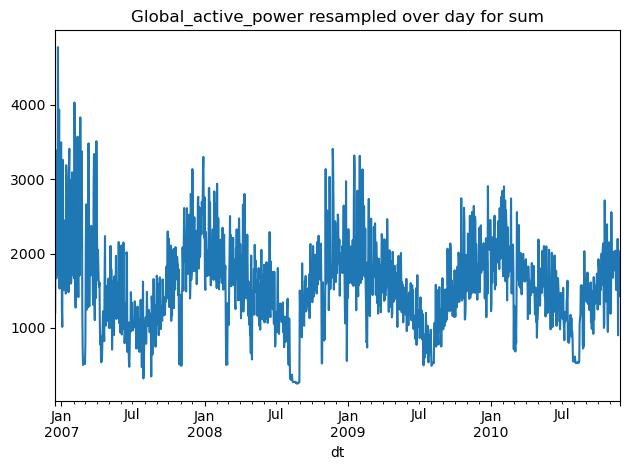

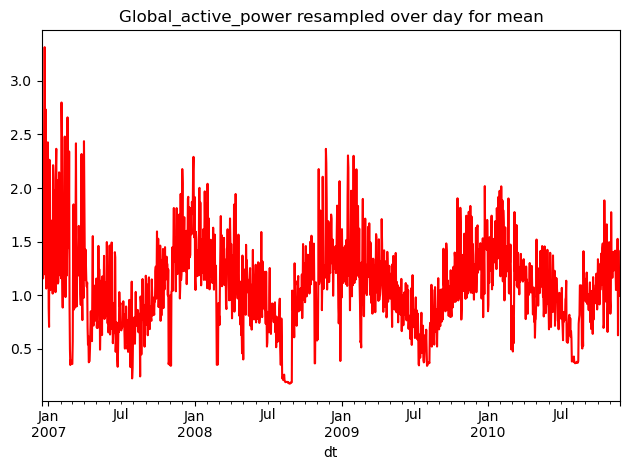

In [13]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

- ÏúÑÏôÄ Í∞ôÏùå

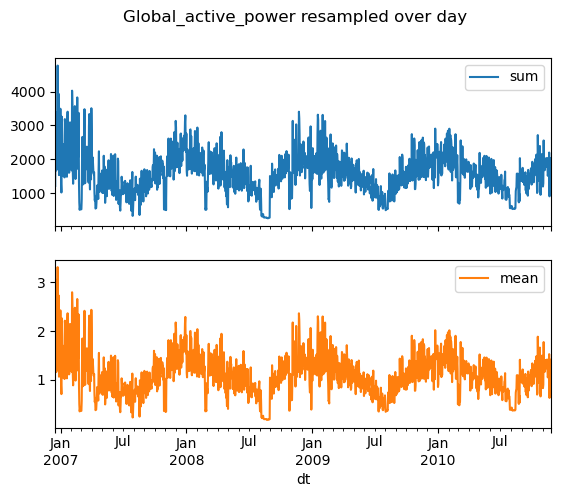

In [15]:
t = df.Global_active_power.resample('D').agg(['sum', 'mean'])

t.plot(subplots = True, title='Global_active_power resampled over day')
plt.show()

- **Global_intensity** 
- 'Global_intensity'Ïùò  mean Í≥º std Í∞Ä ÌïòÎ£® ÎèôÏïà ÏÉòÌîåÎßÅÎêú Í≤É

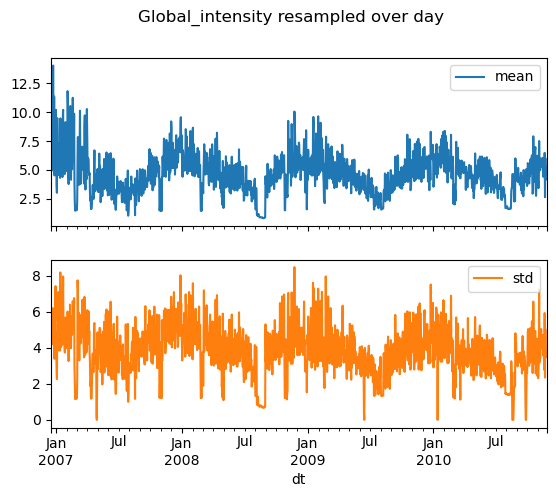

In [16]:
r = df.Global_intensity.resample('D').agg(['mean', 'std'])

r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

- **Global_reactive_power**
- ÌïòÎ£® ÎèôÏïà ÏÉòÌîåÎßÅÎêú 'Global_reactive_power'Ïùò mean Î∞è std

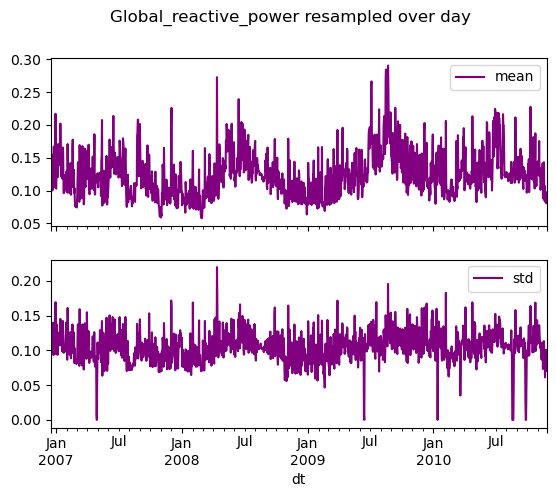

In [17]:
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])

r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='purple')
plt.show()

- **Global_active_power**
- ÌïúÎã¨ ÎèôÏïà ÏÉòÌîåÎßÅÎêú 'Global_active_power'Ïùò sum

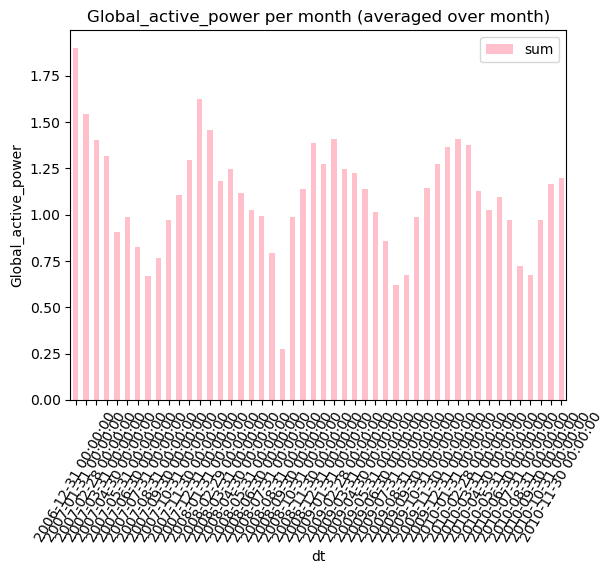

In [18]:
df['Global_active_power'].resample('M').mean().plot(kind='bar', label = "sum", color = "pink")

plt.xticks(rotation=60)
plt.ylabel('Global_active_power')

plt.title('Global_active_power per month (averaged over month)')
plt.legend()
plt.show()

- **Global_active_power**
- Î∂ÑÍ∏∞Î≥ÑÎ°ú Îã§Ïãú ÏÉòÌîåÎßÅÎêú 'Global_active_power'Ïùò mean

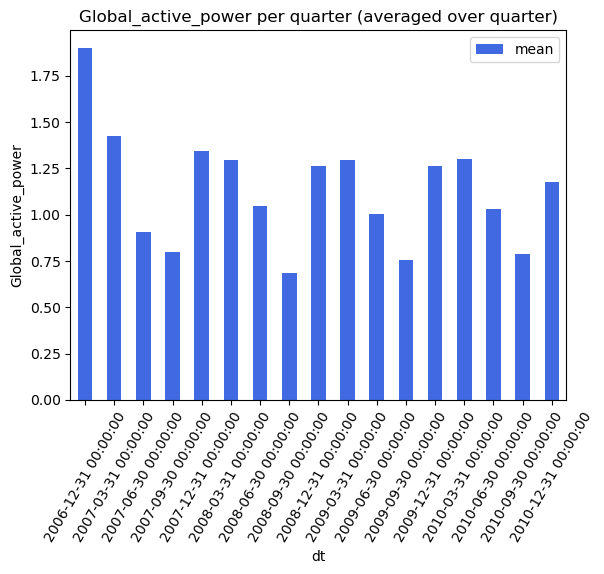

In [19]:
df['Global_active_power'].resample('Q').mean().plot(kind='bar', label = "mean", color = "royalblue")

plt.xticks(rotation=60)
plt.ylabel('Global_active_power')

plt.title('Global_active_power per quarter (averaged over quarter)')
plt.legend()
plt.show()

- **Voltage**
- ÏõîÏóê Í±∏Ï≥ê ÏÉòÌîåÎßÅÎêú 'Voltage'Ïùò mean

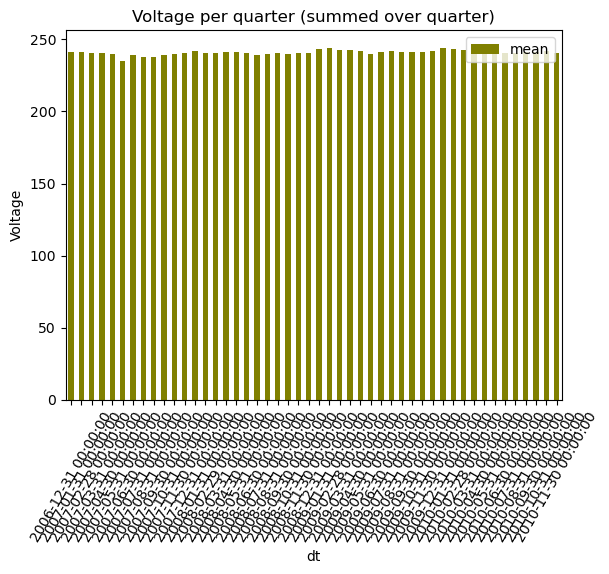

In [20]:
df['Voltage'].resample('M').mean().plot(kind='bar', label = "mean", color = "olive")

plt.xticks(rotation=60)
plt.ylabel('Voltage')

plt.title('Voltage per quarter (summed over quarter)')
plt.legend()
plt.show()

- **Sub_metering_1**
- ÏõîÏóê Í±∏Ï≥ê ÏÉòÌîåÎßÅÎêú 'Sub_metering_1'Ïùò mean

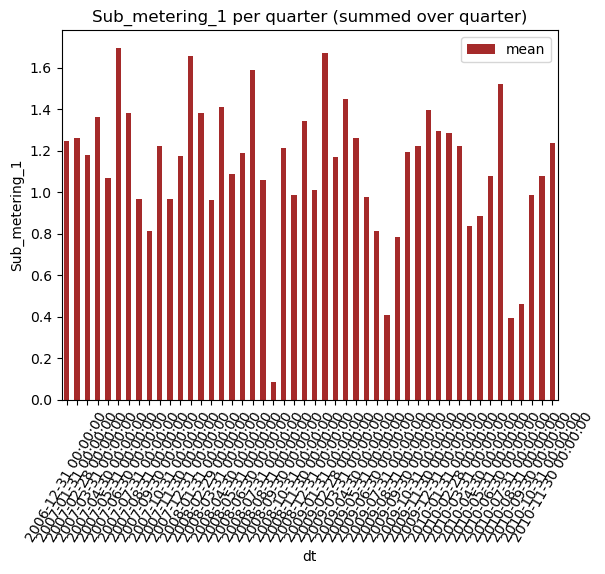

In [21]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', label = "mean", color = "brown")

plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')

plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.legend()
plt.show()

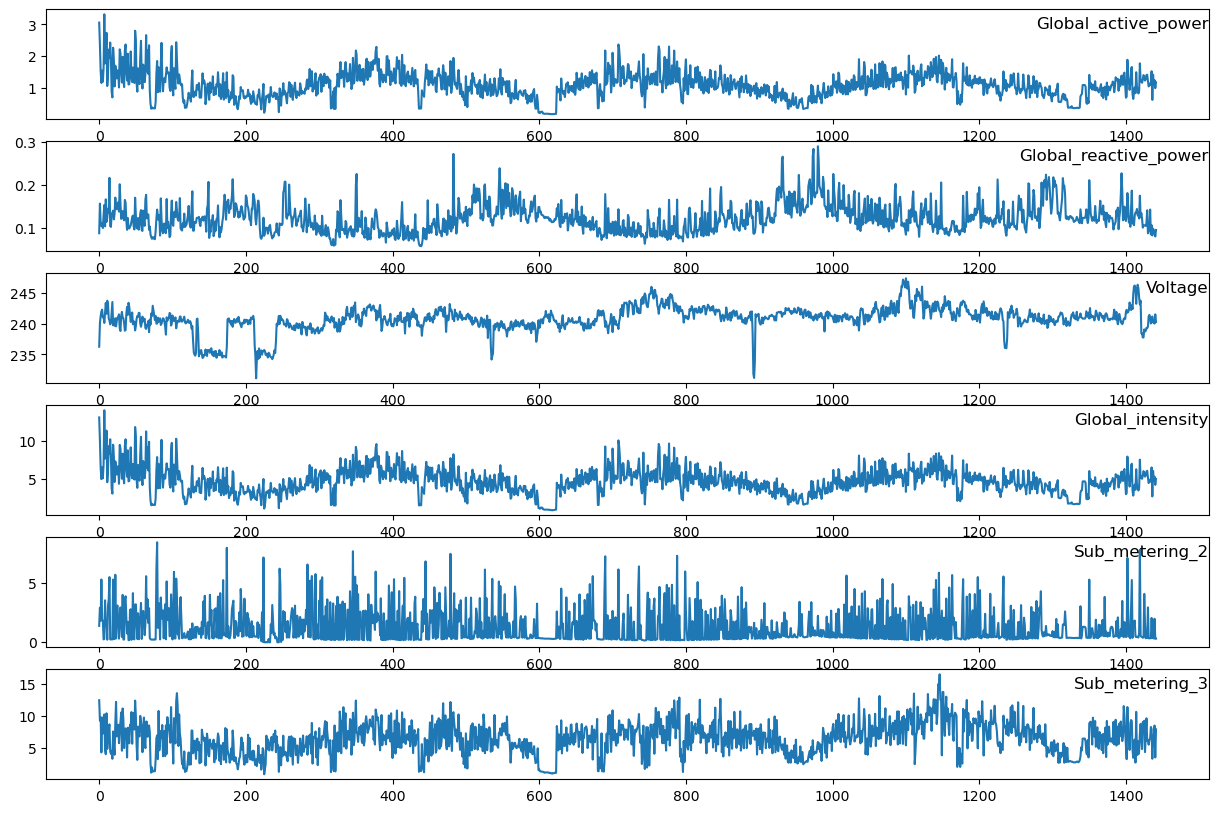

In [22]:
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values

# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

- ÏùºÏ£ºÏùº ÎèôÏïà Ïû¨ÏÉòÌîåÎßÅ Î∞è mean

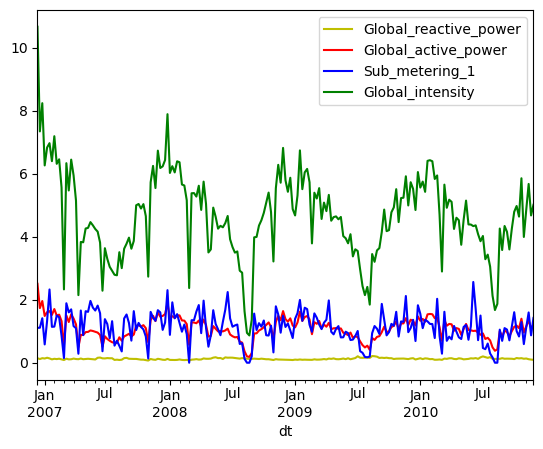

In [23]:
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)

plt.show()

- Ìïú Îã¨Ïóê Í±∏Ï≥ê Ïû¨ÏÉòÌîåÎßÅÎêú Îã§Î•∏ ÌäπÏßïÏùò meanÏóê ÎåÄÌïú histogram

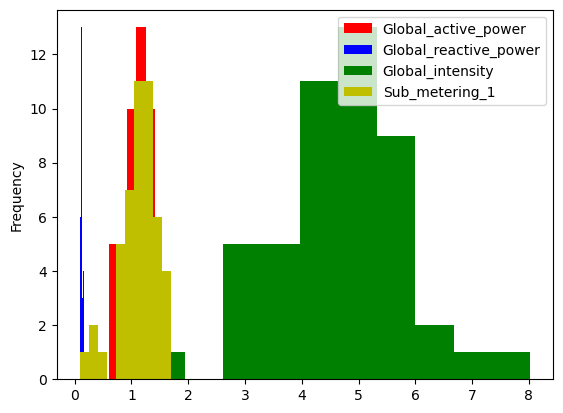

In [29]:
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

- Global_intensity, Global_active_powerÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
    - pct_change
        - Ìïú Í∞ùÏ≤¥ ÎÇ¥ÏóêÏÑú ÌñâÍ≥º ÌñâÏùò Ï∞®Ïù¥Î•º ÌòÑÏû¨Í∞íÍ≥ºÏùò Î∞±Î∂ÑÏú®Î°ú Ï∂úÎ†•ÌïòÎäî Î©îÏÑúÎìú
        - (Îã§ÏùåÌñâ - ÌòÑÏû¨Ìñâ) √∑ ÌòÑÏû¨Ìñâ
        - (Îß§ÎèÑÍ∞ÄÍ≤©-Îß§ÏàòÍ∞ÄÍ≤©)/Îß§ÏàòÍ∞ÄÍ≤© 
        - ÌäπÏ†ï NÏùºÏóê ÎåÄÌïú ÏàòÏùµÎ•†ÏùÑ Íµ¨ÌïòÍ≥† Ïã∂Îã§Î©¥ pct_change(periods=N)ÏùÑ ÏûÖÎ†•


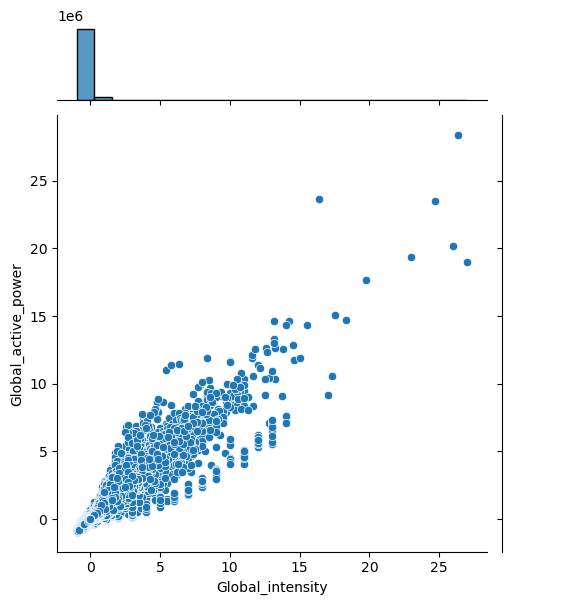

In [30]:
data_returns = df.pct_change()
sns.jointplot(x='Global_intensity', y='Global_active_power', data=data_returns)  

plt.show()

- Voltage'ÏôÄ Global_active_power ÏÇ¨Ïù¥Ïùò ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ

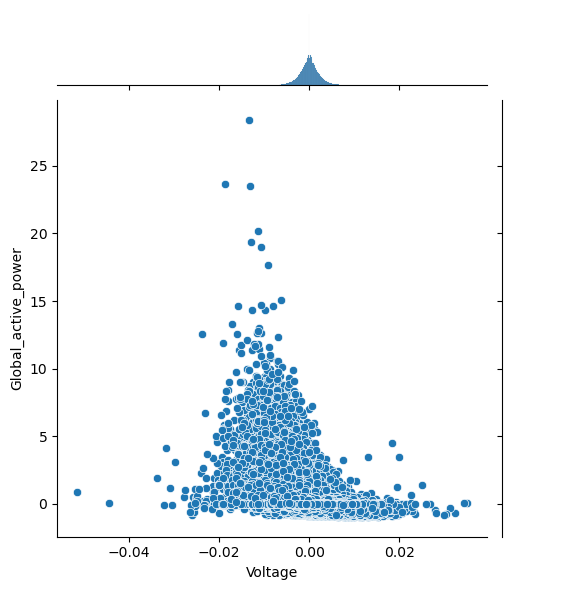

In [31]:
sns.jointplot(x='Voltage', y='Global_active_power', data=data_returns)  

plt.show()

#### 4. Correlations among features

- Ïó¥ Í∞ÑÏùò ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ

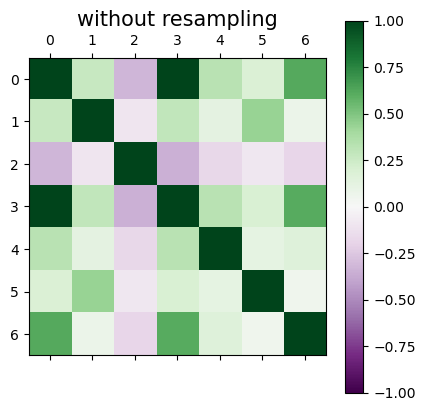

In [32]:
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

- Î™á Í∞úÏõî ÎèôÏïà Ïû¨ÏÉòÌîåÎßÅÎêú ÌäπÏßïÏùò mean ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ

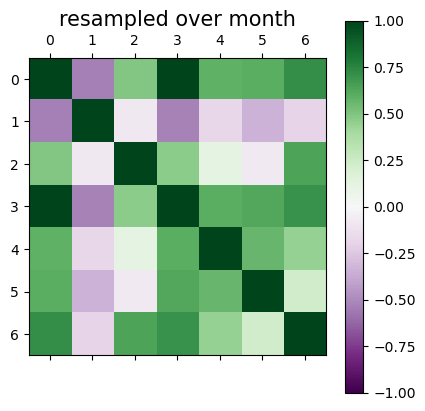

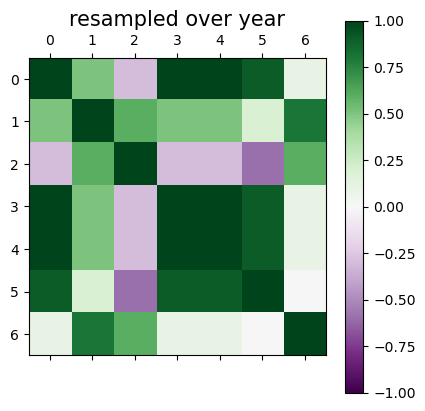

In [33]:
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

#### üíô Machine-Leaning: LSTM 

- ÏãúÍ≥ÑÏó¥Í≥º ÏàúÏ∞®Ï†Å Î¨∏Ï†úÏóê Í∞ÄÏû• Ï†ÅÌï©Ìïú Î∞òÎ≥µ Ïã†Í≤ΩÎßù(LSTM)ÏùÑ Ï†ÅÏö©
    - ÌÅ∞ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† ÏûàÎã§Î©¥ Ïù¥ Ï†ëÍ∑ºÎ≤ïÏù¥ ÏµúÏÑ†
- ÏßÄÎèÑ ÌïôÏäµ Î¨∏Ï†úÎ•º Global_active_power Ï∏°Ï†ï Î∞è Îã§Î•∏ Í∏∞Îä•Ïù¥ Ï£ºÏñ¥ÏßÑ ÌòÑÏû¨ ÏãúÍ∞Ñ(t)ÏóêÏÑú Global_active_powerÎ•º ÏòàÏ∏°ÌïòÎäî Í≤ÉÏúºÎ°ú ÌîÑÎ†àÏûÑÌï† Í≤É

In [14]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

- Í≥ÑÏÇ∞ ÏãúÍ∞ÑÏùÑ Îã®Ï∂ïÌïòÍ≥† Î™®Îç∏ÏùÑ ÌÖåÏä§Ìä∏Ìï† Ïàò ÏûàÎäî Îπ†Î•∏ Í≤∞Í≥ºÎ•º ÏñªÍ∏∞ ÏúÑÌï¥ ÏãúÍ∞Ñ Îã®ÏúÑÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Ïû¨Íµ¨ÏÑ± (ÏõêÎûò Îç∞Ïù¥ÌÑ∞Îäî Î∂Ñ Îã®ÏúÑÎ°ú Ï†úÍ≥µ)
- Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¨Í∏∞Í∞Ä 2075259ÏóêÏÑú 34589Î°ú Ï§ÑÏñ¥Îì§ÏßÄÎßå, Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥Ï†ÅÏù∏ Íµ¨Ï°∞Îäî Ïú†ÏßÄÎêúÎã§.

In [15]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

- [0,1] Î≤îÏúÑÏùò Î™®Îì† Í∏∞Îä•ÏùÑ ÌôïÏû•
- Ïû¨ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞(ÏãúÍ∞Ñ Ïù¥ÏÉÅ)Î•º Í∏∞Î∞òÏúºÎ°ú ÌõàÎ†®

In [16]:
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


#### üíô Splitting the rest of data to train and validation sets

- Ï§ÄÎπÑÎêú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º trainÏôÄ test setÎ°ú ÎÇòÎàî
- Î™®Îç∏Ïùò ÍµêÏú° ÏÜçÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ Îç∞Ïù¥ÌÑ∞ Ï≤´Ìï¥ÏóêÎßå Î™®Îç∏ÏùÑ train Ìïú ÌõÑ Ìñ•ÌõÑ 3ÎÖÑ ÎèôÏïà Îç∞Ïù¥ÌÑ∞Î•º ÌèâÍ∞Ä

In [17]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)


#### üíô Model architecture

- 1) Ï≤´ Î≤àÏß∏ visible layer Ïóê 100Í∞úÏùò Îâ¥Îü∞Ïù¥ ÏûàÎäî LSTM
- 2) 20%Î•º dropout
- 3) Global_active_powerÎ•º ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌïú output layer Ïùò Îâ¥Îü∞ 1Í∞ú
- 4) Global_active_powerÎ•º ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌïú output layer Ïùò Îâ¥Îü∞ 1Í∞ú
- 5) ÌèâÍ∑† Ï†àÎåÄ Ïò§Ï∞®(MAE) ÏÜêÏã§ Ìï®ÏàòÏôÄ ÌôïÎ•†Ï†Å Í≤ΩÏÇ¨ Í∞ïÌïòÏùò Ìö®Ïú®Ï†ÅÏù∏ Adam Î≤ÑÏ†ÑÏùÑ ÏÇ¨Ïö©

In [18]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

2022-09-20 13:33:20.592011: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-20 13:33:20.593226: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


- 6) Î™®Îç∏ÏùÄ batch sizeÍ∞Ä 70Ïù∏ 20Í∞úÏùò training epoch Ïóê Ï†ÅÌï©Ìï† Í≤É

In [19]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
126/126 - 3s - loss: 0.0213 - val_loss: 0.0119 - 3s/epoch - 23ms/step
Epoch 2/20
126/126 - 1s - loss: 0.0127 - val_loss: 0.0109 - 974ms/epoch - 8ms/step
Epoch 3/20
126/126 - 1s - loss: 0.0116 - val_loss: 0.0101 - 1s/epoch - 8ms/step
Epoch 4/20
126/126 - 1s - loss: 0.0109 - val_loss: 0.0096 - 1s/epoch - 10ms/step
Epoch 5/20
126/126 - 2s - loss: 0.0107 - val_loss: 0.0092 - 2s/epoch - 16ms/step
Epoch 6/20
126/126 - 1s - loss: 0.0106 - val_loss: 0.0091 - 1s/epoch - 8ms/step
Epoch 7/20
126/126 - 2s - loss: 0.0105 - val_loss: 0.0092 - 2s/epoch - 12ms/step
Epoch 8/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0092 - 1s/epoch - 9ms/step
Epoch 9/20
126/126 - 1s - loss: 0.0104 - val_loss: 0.0092 - 1s/epoch - 9ms/step
Epoch 10/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0092 - 980ms/epoch - 8ms/step
Epoch 11/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0092 - 1s/epoch - 8ms/step
Epoch 12/20
126/126 - 1s - loss: 0.0105 - val_loss: 0.0092 - 1s/epoch - 9ms/step
Epoch 13/20
126/126 - 2s - 

- Loss ÏãúÍ∞ÅÌôî

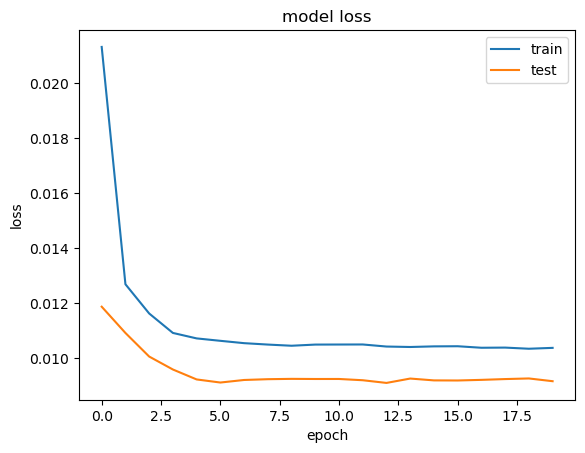

In [20]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

- ÏòàÏ∏°ÌïòÍ∏∞ + RMSE

In [21]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.616


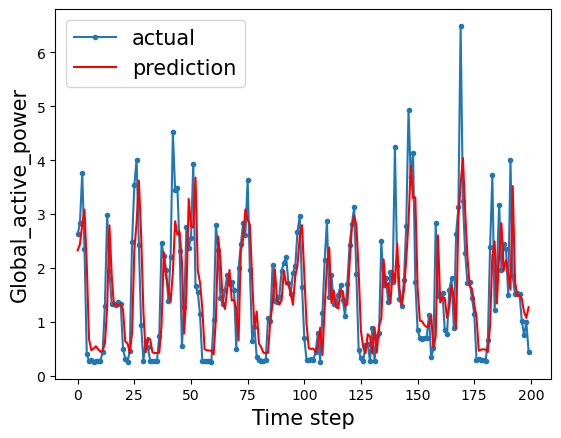

In [22]:
aa=[x for x in range(200)]

plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()